<a href="https://colab.research.google.com/github/leilaabdel/optic-nerve-regen/blob/master/notebooks/track_regen_img_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Imports
import pickle
import cv2
import matplotlib.pyplot as plt
import glob
import os
import numpy as np


In [ ]:
# Change this depending on your own ROOT folder
ROOT = '/content/drive/MyDrive/Scientific_Studies/Optholmology/Optic-Nerve-Regen/Opthalmology-Research/regen_images'

In [ ]:
IMG_PATH = f"{ROOT}/data/rewiring-imgs/*tiff"
ALL_IMG_PATHS = glob.glob(IMG_PATH)

In [ ]:
ALL_IMG_PATHS

['/content/drive/MyDrive/Scientific_Studies/Optholmology/Optic-Nerve-Regen/Opthalmology-Research/regen_images/data/rewiring-imgs/sgCtrl.tiff',
 '/content/drive/MyDrive/Scientific_Studies/Optholmology/Optic-Nerve-Regen/Opthalmology-Research/regen_images/data/rewiring-imgs/sgLipin1.tiff',
 '/content/drive/MyDrive/Scientific_Studies/Optholmology/Optic-Nerve-Regen/Opthalmology-Research/regen_images/data/rewiring-imgs/shCtrl.tiff',
 '/content/drive/MyDrive/Scientific_Studies/Optholmology/Optic-Nerve-Regen/Opthalmology-Research/regen_images/data/rewiring-imgs/shLipin1.tiff']

In [ ]:
sgCtrl = cv2.imread(ALL_IMG_PATHS[0])[:,:,0]
sgLipin1 = cv2.imread(ALL_IMG_PATHS[1])[:,:,0]
shCtrl = cv2.imread(ALL_IMG_PATHS[2])[:,:,0]
shLipin1 = cv2.imread(ALL_IMG_PATHS[3])[:,:,0]

In [ ]:
difference_sg = np.abs(sgCtrl - sgLipin1) 
difference_sh = np.abs(sgCtrl - sgLipin1) # sgCtrl / (sgLipin1 + 1e-12)
difference_sg , difference_sh = difference_sg/np.max(difference_sg) , difference_sh/np.max(difference_sh)

In [ ]:
np.max(difference_sg)

1.0

In [ ]:
difference_sh[difference_sh == 0] = 1e-32
np.log(difference_sh)

array([[-2.07552764e+00, -1.59001983e+00, -1.51591185e+00, ...,
        -2.17396772e+00, -4.84811636e+00, -1.98026273e-02],
       [-2.07552764e+00, -1.59001983e+00, -1.51591185e+00, ...,
        -2.32238772e+00,  0.00000000e+00, -2.78347990e-02],
       [-1.95774461e+00, -1.49821228e+00, -1.48082053e+00, ...,
        -3.46182200e+00, -7.74317401e-02, -6.89928715e-02],
       ...,
       [-2.17396772e+00, -1.75707391e+00, -1.78006343e+00, ...,
        -3.18752085e-02, -1.20728546e-01, -9.88458346e-02],
       [-3.23867845e+00, -2.76867482e+00, -2.76867482e+00, ...,
        -3.92927814e-03, -3.59320092e-02, -2.38106487e-02],
       [-7.36827230e+01, -7.36827230e+01, -7.36827230e+01, ...,
        -7.36827230e+01, -7.36827230e+01, -7.36827230e+01]])

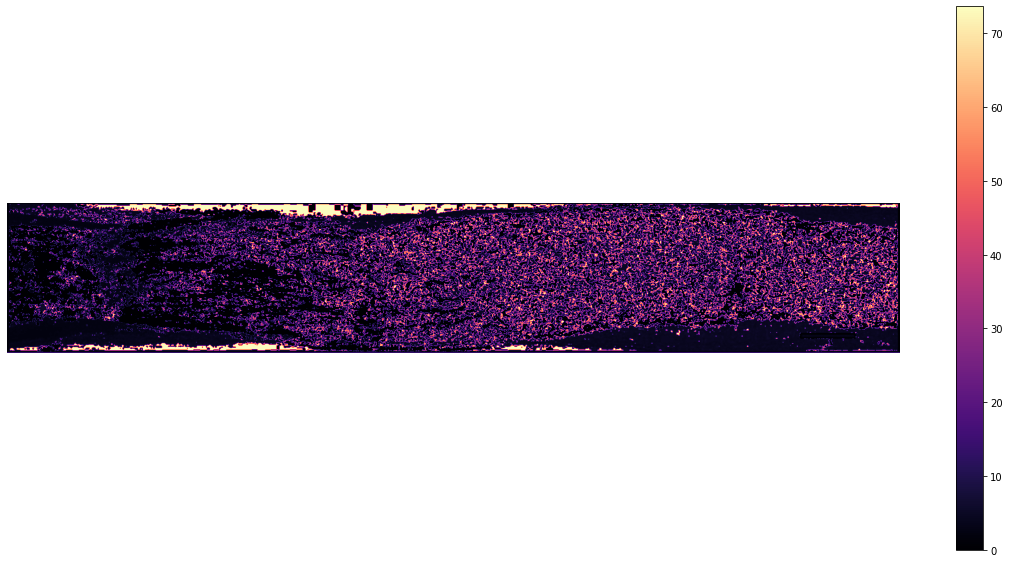

In [ ]:
IMG = difference_sh 
fig = plt.figure(figsize=(20,10))
# IMG[IMG <= 0.5] = 0

plt.axis('off')
im = np.log(1 / IMG) 
# im[im == np.max(im)] = 0
plt.imshow(im , cmap='magma')
plt.colorbar()
name = "shLipin1_log_fc_2"
fig.savefig(f"{name}_channel_red.png" , dpi=300)